In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
filename = '231108 spon647_rimbp680 6DIV'
cellzone = 'Acquisition-3'

path_data = "/Volumes/Seagate/Elisa_STORM/Good_Images"

path_ims = f"/Volumes/Seagate/Elisa_STORM/Good_Images/{filename}/{cellzone}/demix/data"
channel1 = f'/Volumes/Seagate/Elisa_STORM/Good_Images/{filename}/{cellzone}/demix/CoordTable_SAFE360_MULTIPLEXING_demixed_w1_SMLMFiltered.csv'

data_in_680 = pd.read_csv(channel1)[['x [nm]', 'y [nm]', 'z [nm]']].to_numpy(dtype=np.float64)

data = pd.read_pickle(os.path.join(path_data, 'storm_data.pkl'))

masks_680 = np.load(os.path.join(path_ims, 'masks_680.npy'), allow_pickle=True)
masks_647 = np.load(os.path.join(path_ims, 'masks_647.npy'), allow_pickle=True)

clusters_680 = np.load(os.path.join(path_ims, 'clusters_680.npy'), allow_pickle=True)
clusters_647 = np.load(os.path.join(path_ims, 'clusters_647.npy'), allow_pickle=True)

points_680 = np.load(os.path.join(path_ims, 'points_680.npy'), allow_pickle=True)
points_647 = np.load(os.path.join(path_ims, 'points_647.npy'), allow_pickle=True)

wfi_680 = np.load(os.path.join(path_ims, 'simulated_widefiel_680.npy'), allow_pickle=True)
wfi = np.load(os.path.join(path_ims, 'simulated_widefield.npy'), allow_pickle=True)


/var/folders/wp/vdz8xvgn5wsg6tnzscd_9rlc0000gn/T/ipykernel_1070/1015005070.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  info1 = data[data['FileName']==filename][data['Acquisition']==cellzone]


IndexError: index 541669 is out of bounds for axis 0 with size 22807

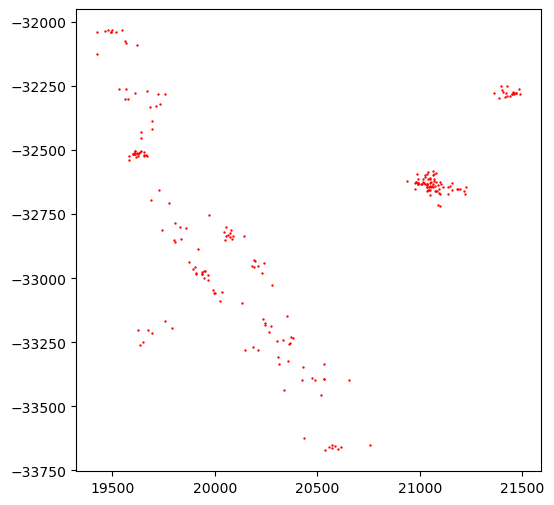

In [29]:
info1 = data[data['FileName']==filename][data['Acquisition']==cellzone]

plt.figure(figsize=(6, 6))
for index, row in info1.iterrows():
    # Plot the current cluster in red
    points = row['points']
    plt.scatter(points[:, 1], -points[:, 0], c='red',s=0.5)

    # Plot the related cluster in black
    indices = row['NN_647_to_680_ind']

    related_points = data_in_680[indices]

    plt.scatter(related_points[:, 1], -related_points[:, 0], c='black', s=0.5)

plt.xlim(0,50000)
plt.ylim(-50000, 0)
plt.show()

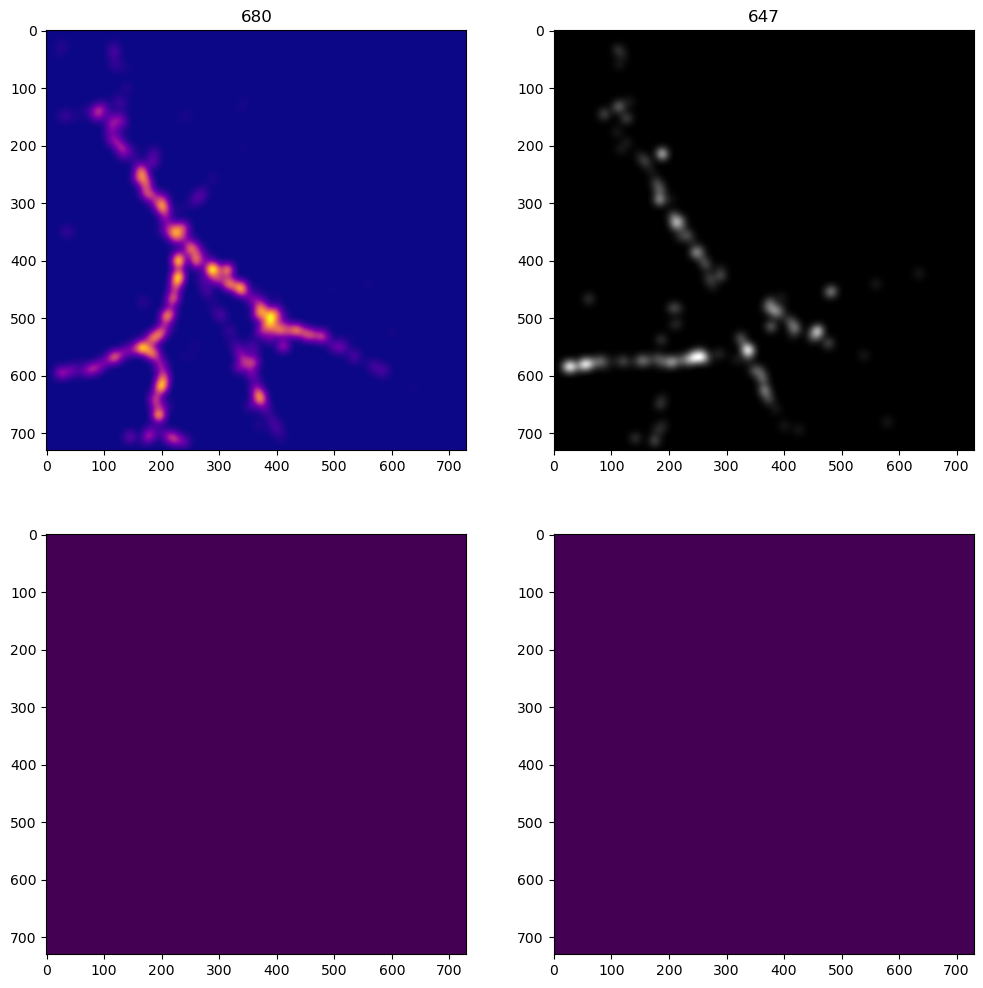

<Figure size 640x480 with 0 Axes>

In [31]:
data_680 = wfi_680
data_647 = wfi

# Number of slices
num_slices = data_680.shape[2]

# Plotting side by side
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i in range(4, num_slices):
    # Plot from the masks_680 array
    axes[0,0].imshow(data_680[:,:,i], cmap='plasma')  # You can change the colormap ('viridis' is just an example)
    axes[0,0].set_title(f'680')

    # Plot from the masks_647 array
    axes[0,1].imshow(data_647[:,:,i], cmap='gray')  # You can change the colormap here as well
    axes[0,1].set_title(f'647')

    axes[1,0].imshow(masks_680[:,:,i], cmap='viridis')  # You can change the colormap here as well

    axes[1,1].imshow(masks_647[:,:,i], cmap='viridis')  # You can change the colormap here as well


    plt.show()
# Adjust layout to prevent overlapping titles
plt.tight_layout()
